In [17]:
import os
os.sys.path.append('../project_code')

from data.bhsa import book_sets, get_data
from markov.Markov_Chain import *

test = get_data(books="all")

In [18]:
features = {'clause_types', 'phrase_functions', 'phrase_types', 'word_pos'}
domain = {'N', 'Q', 'D'}

In [19]:
data = collections.defaultdict(dict)
for f in features:
    for d in domain:
        transMatrix = transitionMatrix(test[f][d], False) 
        #Here, transformations can be performed
        transDict = df_dict_Transformation(transMatrix)
        data[f][d] = pd.DataFrame(transDict).fillna(0)

In [20]:
data["phrase_functions"]["N"].head()

,1_Chronicles,1_Kings,1_Samuel,2_Chronicles,2_Kings,2_Samuel,Amos,Daniel,Deuteronomy,Ecclesiastes,...,Micah,Nahum,Nehemiah,Numbers,Proverbs,Psalms,Ruth,Song_of_songs,Zechariah,Zephaniah
Adju->Adju,24.0,5.0,5.0,21.0,4.0,1.0,0.0,0.0,4.0,0.0,...,0.0,0.0,7.0,11.0,0.0,4.0,0.0,0.0,0.0,0.0
Adju->Cmpl,23.0,6.0,5.0,31.0,11.0,9.0,0.0,0.0,2.0,0.0,...,0.0,0.0,3.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0
Adju->Conj,81.0,83.0,45.0,182.0,75.0,61.0,2.0,19.0,31.0,0.0,...,1.0,0.0,43.0,47.0,2.0,37.0,4.0,0.0,6.0,0.0
Adju->Exst,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->Frnt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
stack_Data = stackTransitions(data, features, {"D"})
stack_Data.shape

(1754, 32)

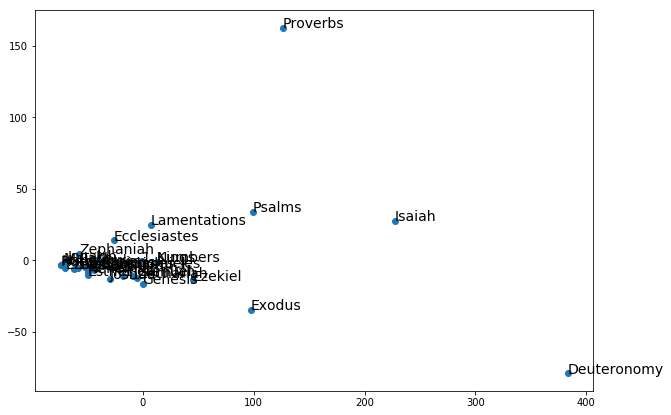

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=10)

pca_prop = pca.fit_transform(stack_Data.T.values) # PCA happens here

# create a scatter plot of the projection
plt.figure(1, figsize=(10, 7))
plt.scatter(pca_prop[:, 0], pca_prop[:, 1])

# annotate
books = stack_Data.columns
for i, book in enumerate(books):
    plt.annotate(book, xy=(pca_prop[i, 0], pca_prop[i, 1]), fontsize=14)
plt.show()

In [187]:
n_samples = df.shape[0]
# We center the data and compute the sample covariance matrix.
df -= np.mean(df.values, axis=0)
cov_matrix = np.dot(df.values, df.T.values) / n_samples
for eigenvector in pca.components_:
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))

3281.35933117
103.338531161
57.9084381031
6.86050653006
6.77134684973
4.34185974558
3.10637169567
2.64700827605
2.83784476912
3.15946274832
